# Solar Power Generation Forecasting

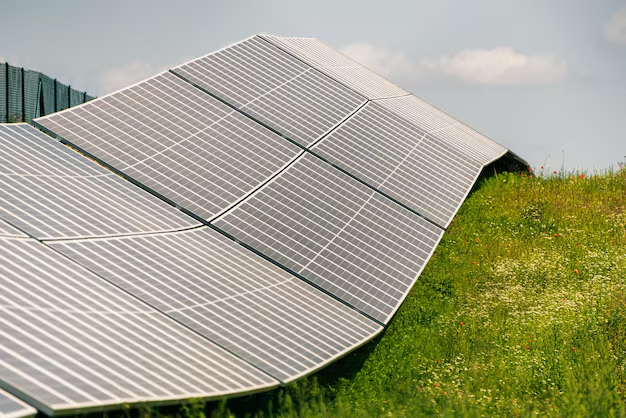

##### Problem Statement : Using the provided solar power dataset ( ambient temp, module temp, irradiation, AC power, DC power, Daily yeild and total yeild, etc...) develop a model to predict future solar power output. The goal is to use historical weather and production  Data to estimate how much electricity the plant will genearte for the particular temp and irradiation 

In [1]:
%pip install seaborn
%pip install matplotlib

import pandas as pd # To do data manipulation and analysis
import numpy as np # To perform numerical operations
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For advanced Data visualizations



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Loading the plant 1 generation and Weather Sensor Data
generation_data = pd.read_csv('Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')


In [3]:
# explore and unserstand the data
print(generation_data.head()) # prints the first 5 rows of the dataframe
print(generation_data.info()) # prints a concise summary of the dataframe
print(generation_data.describe()) # prints the statistical summary of the dataframe
print(generation_data.isnull().sum()) # prints the number of missing values in each column


          DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
2          0.0    6987759.0  
3          0.0    7602960.0  
4          0.0    7158964.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float

### Merging Geneartion and Weather Sensor data

In [4]:

# before merging the datasets we ne to convert date time format for proper time alignement

generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'], dayfirst=True) # Parsing the date string in the format of Day/month/year
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'])
weather_data.head()
### Merging Geneartion and Weather Sensor data
merged_data = pd.merge(generation_data, weather_data, on='DATE_TIME', how='inner')
print(merged_data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68774 entries, 0 to 68773
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            68774 non-null  datetime64[ns]
 1   PLANT_ID_x           68774 non-null  int64         
 2   SOURCE_KEY_x         68774 non-null  object        
 3   DC_POWER             68774 non-null  float64       
 4   AC_POWER             68774 non-null  float64       
 5   DAILY_YIELD          68774 non-null  float64       
 6   TOTAL_YIELD          68774 non-null  float64       
 7   PLANT_ID_y           68774 non-null  int64         
 8   SOURCE_KEY_y         68774 non-null  object        
 9   AMBIENT_TEMPERATURE  68774 non-null  float64       
 10  MODULE_TEMPERATURE   68774 non-null  float64       
 11  IRRADIATION          68774 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(2), object(2)
memory usage: 6.3+ MB
None


C:\Users\Asys\AppData\Local\Temp\ipykernel_15880\1559130781.py:4: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'])


In [5]:

# Aggregating Generation Data
generation_agg = generation_data.groupby('DATE_TIME').agg({
    'DC_POWER':'sum', #calculating the sum of DC_Power
    'AC_POWER':'sum', #calculating the sum of AC_POWER
    'DAILY_YIELD' : 'mean', #calculating the average of DAILY_YEILD
    'TOTAL_YIELD' : 'mean' #calculating the average of TOTAL_YIELD
}).reset_index() # Used to control and manage the structure of a Dataframe's Index



In [6]:
# aggregating Weather Sensor Data
weather_agg = weather_data.groupby('DATE_TIME').agg({
    'AMBIENT_TEMPERATURE' : 'mean', #calculating average AMBIENT_TEMPERATURE
    'MODULE_TEMPERATURE' : 'mean', #calculating average MODULE_TEMPERATURE
    'IRRADIATION' : 'mean' #calculating average IRRADIATION
}).reset_index()
# Merging the aggregated data

Final_Data = pd.merge(generation_agg,weather_agg,on='DATE_TIME',how='inner') #how carries other values like outer, left and right
# Savind the Merged Dataset
Final_Data.to_csv('Plant1_Merged_Dataset.csv',index=False)
print(Final_Data.info()) # Final_Data now contains the aggregated and merged information from both datasets



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3157 non-null   datetime64[ns]
 1   DC_POWER             3157 non-null   float64       
 2   AC_POWER             3157 non-null   float64       
 3   DAILY_YIELD          3157 non-null   float64       
 4   TOTAL_YIELD          3157 non-null   float64       
 5   AMBIENT_TEMPERATURE  3157 non-null   float64       
 6   MODULE_TEMPERATURE   3157 non-null   float64       
 7   IRRADIATION          3157 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 197.4 KB
None


In [7]:
Final_Data.isnull().sum() # checking for missing values in the final dataset

DATE_TIME              0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

### Binnig

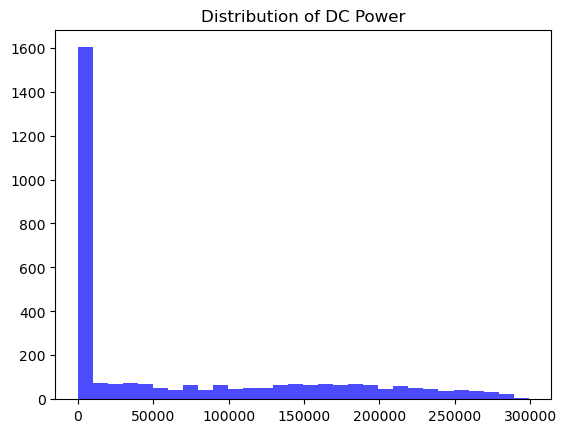

In [8]:
# Histogram 
plt.hist(Final_Data['DC_POWER'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of DC Power')
plt.show()

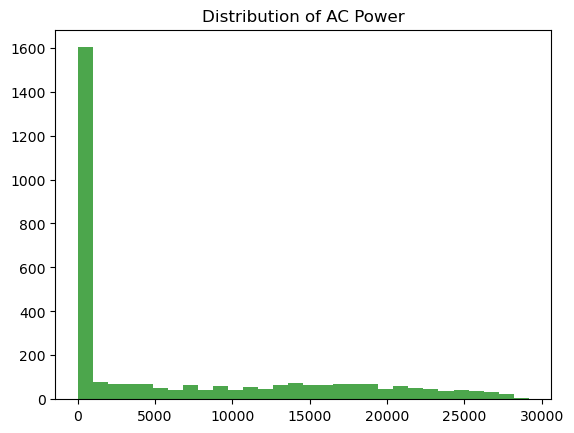

In [9]:
plt.hist(Final_Data['AC_POWER'], bins=30, color='green', alpha=0.7)
plt.title('Distribution of AC Power')
plt.show()

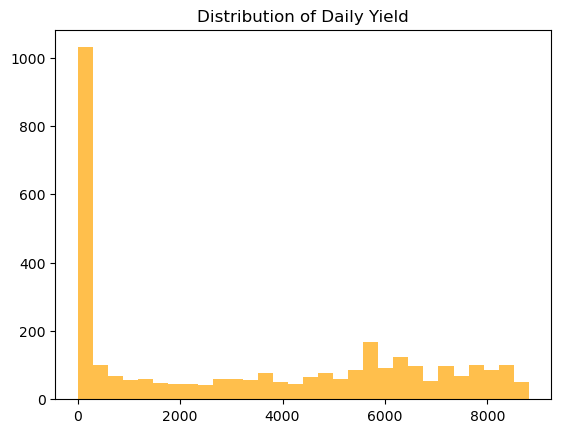

In [10]:
plt.hist(Final_Data['DAILY_YIELD'], bins=30, color='orange', alpha=0.7)
plt.title('Distribution of Daily Yield')
plt.show()

### Univariant Analysis

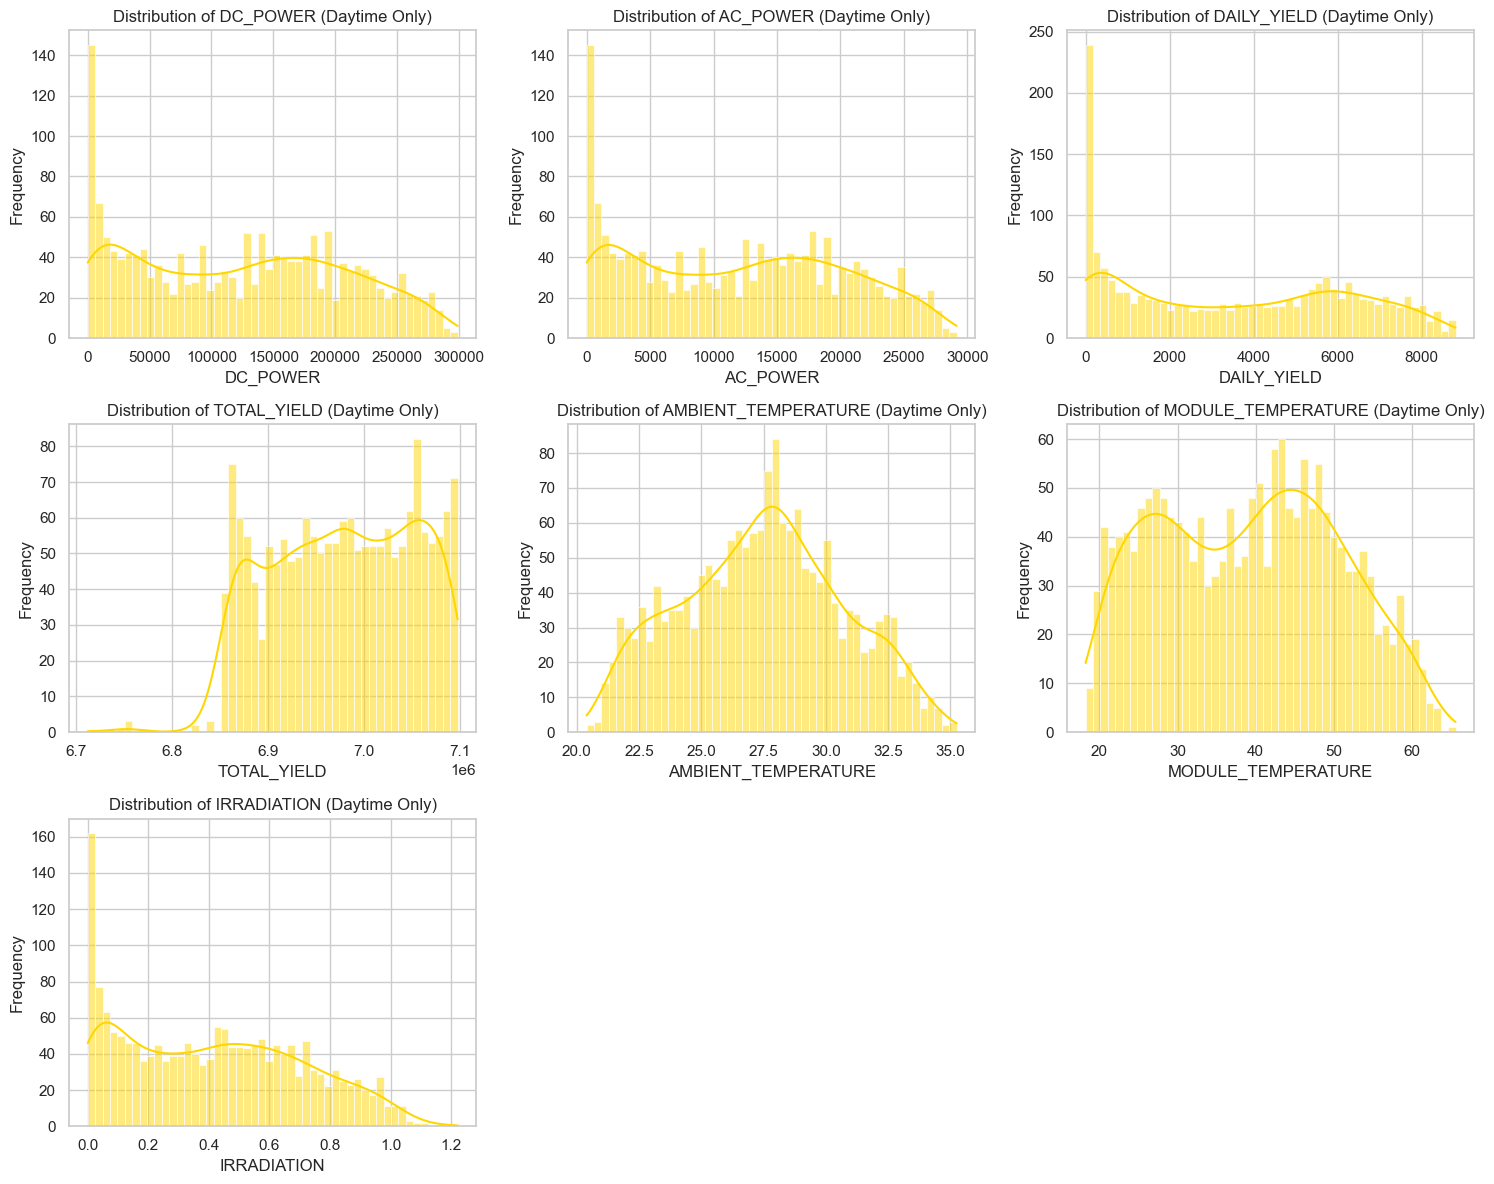

In [11]:
import math

# create daytime_data (IRRADIATION > 0) and select numeric columns
daytime_data = Final_Data[Final_Data['IRRADIATION'] > 0].copy()
numeric_columns = daytime_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

n = len(numeric_columns)
if n == 0:
    print("No numeric columns to plot.")
else:
    ncols = 3
    nrows = math.ceil(n / ncols)
    sns.set(style="whitegrid")
    plt.figure(figsize=(5 * ncols, 4 * nrows))
    for i, col in enumerate(numeric_columns):
        plt.subplot(nrows, ncols, i + 1)
        sns.histplot(daytime_data[col].dropna(), kde=True, bins=50, color='gold')
        plt.title(f'Distribution of {col} (Daytime Only)')
        plt.xlabel(col)
        plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()
    


###
**A short summary From the above Feature Distribution**
* **DC_POWER & AC_POWER** : Both show right-skewed distributions, indicating most readings are at lower power levels with fewer high-output instances.
* **DAILY_YEILD** : Right-skewed distribution suggests many days with lower energy production, potentially due to shorter daylight hours or cloudy weather conditions.
* **TOTAL_YEILD** : Displays a narrow range with a nearly uniform spread.
* **AMBIENT_TEMPERATURE** : Approximately normal distribution centered around 27–28°C.
* **MODULE_TEMPERATURE** : Bimodal distribution shows distinct heating patterns
* **IRRADIATION** : Strongly right-skewed, with a high frequency of low values.


### Bivariant Analysis

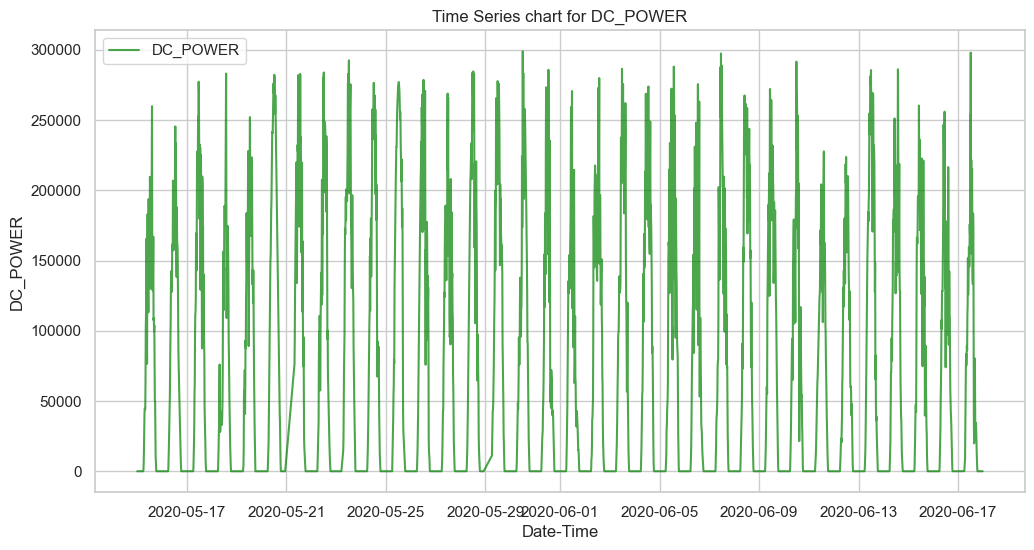

In [12]:
# Set DATE_TIME as the index
Final_Data.set_index('DATE_TIME', inplace=True)
Final_Data.sort_index(inplace=True)

# Plot DC_POWER time series
plt.figure(figsize=(12, 6))
plt.plot(Final_Data.index, Final_Data['DC_POWER'], color="green", alpha=0.7, label="DC_POWER")

plt.title("Time Series chart for DC_POWER")
plt.xlabel("Date-Time")
plt.ylabel("DC_POWER")
plt.legend()
plt.show()


### Applying Correlation Heat map for Final Data

In [13]:
# Correlation Heatmap 
correlation_matrix = Final_Data.corr(numeric_only = True) # calculating the pairwise correlation b/w all numerical columns
correlation_matrix


,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
DC_POWER,1.000000,0.999997,0.075897,-0.009787,0.725679,0.960939,0.995957
AC_POWER,0.999997,1.000000,0.075839,-0.009706,0.725879,0.961011,0.995864
DAILY_YIELD,0.075897,0.075839,1.000000,0.019176,0.491900,0.198208,0.073364
TOTAL_YIELD,-0.009787,-0.009706,0.019176,1.000000,-0.202452,-0.076345,-0.017062
AMBIENT_TEMPERATURE,0.725679,0.725879,0.491900,-0.202452,1.000000,0.853162,0.721839
MODULE_TEMPERATURE,0.960939,0.961011,0.198208,-0.076345,0.853162,1.000000,0.961422
IRRADIATION,0.995957,0.995864,0.073364,-0.017062,0.721839,0.961422,1.000000


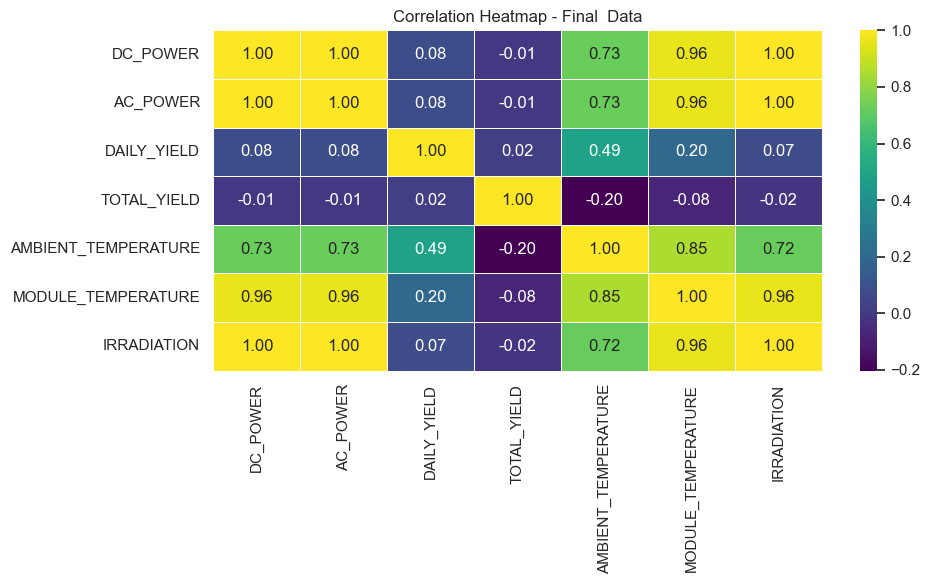

In [14]:
plt.figure(figsize=(10, 6)) # sets the figure size as 10 inches width and 6 inches tall
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5) 
plt.title("Correlation Heatmap - Final  Data")
plt.tight_layout() # used to prevent the overlapping in the figure area
plt.show() # used to visualize the figure



From the above correlation heatmap we can clearly understand that the high correlations near 1+ shows that irradiation is the dominant factor
driving power production and module temperature. The Moderate positive correlations around 0.5 to 0.8 shows more energy produced on sunny days based on the  AMBIENT_TEMPERATURE with DC_POWER / AC_POWER and DAILY_YIELD. The weak (0) or negative (-) values shows no correlation and it's not statistically meaningful.


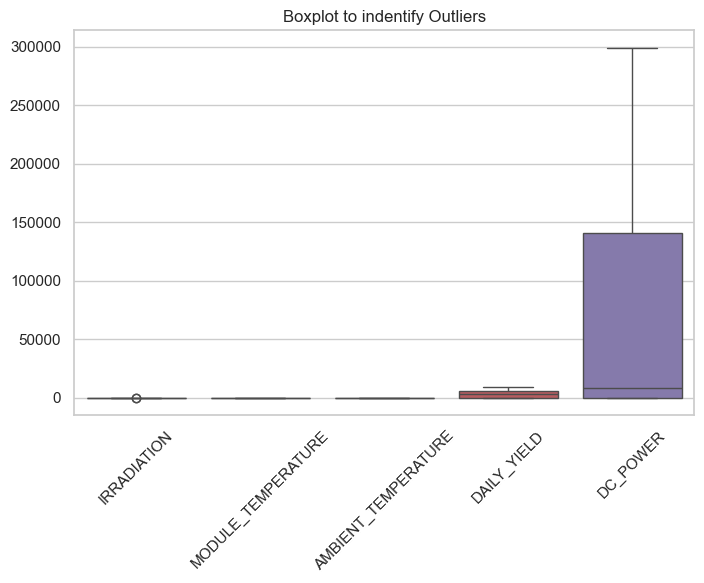

In [15]:
# Using these features to visualize the box plot to identify the outliers in a dataframe
Features = [
    'IRRADIATION',
    'MODULE_TEMPERATURE',
    'AMBIENT_TEMPERATURE',
    'DAILY_YIELD',
    'DC_POWER'
]
plt.figure(figsize=(8, 5))
sns.boxplot(data=Final_Data[Features])
plt.title("Boxplot to indentify Outliers")
plt.xticks(rotation=45)
plt.show()


In [16]:
# creating a copy to avoid the changes in original data
Data_Clean = Final_Data.copy()


In [17]:
#applying IQR method to remove the outliers
for col in Features:
    Q1 = Data_Clean[col].quantile(0.25)
    Q3 = Data_Clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    Data_Clean = Data_Clean[(Data_Clean[col] >= lower_bound) & (Data_Clean[col] <= upper_bound)]


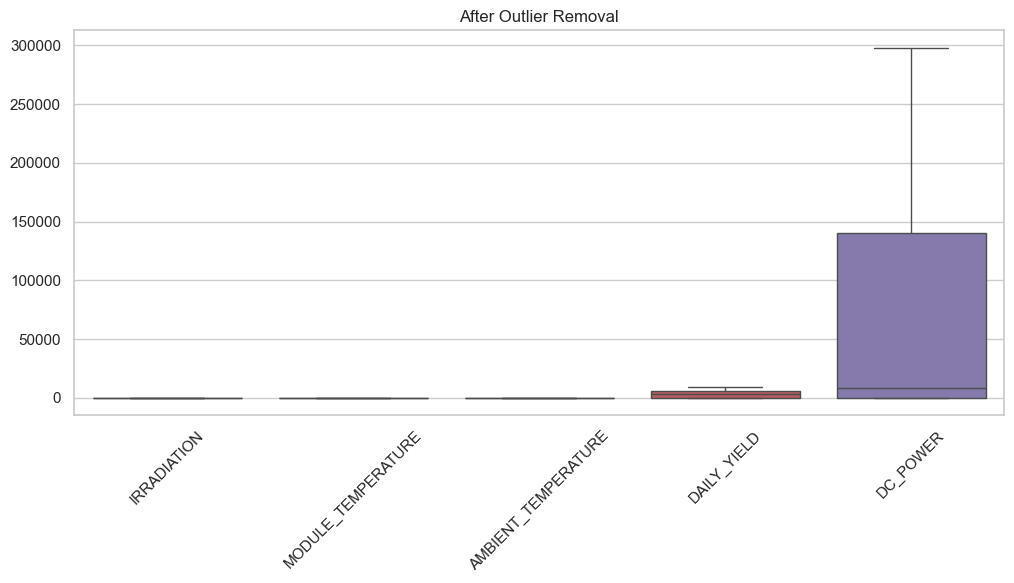

In [18]:

#Visualizing the box plot after removing the outliers
plt.figure(figsize=(12, 5))
sns.boxplot(data=Data_Clean[Features])
plt.title("After Outlier Removal")
plt.xticks(rotation=45)
plt.show()


### Regresion Model

In [19]:
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.model_selection import train_test_split # For splitting dataset into training and testing set
from sklearn.linear_model import LinearRegression # For Model Selection
from sklearn.ensemble import RandomForestRegressor # Model Selection for Random Forest
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # To Evaluate Model's Performance
from datetime import datetime  # To handle time based features 
import joblib # For saving and Loading the Trained Model


In [20]:
features_to_scale = [
    'IRRADIATION',
    'MODULE_TEMPERATURE',
    'AMBIENT_TEMPERATURE',
    'DAILY_YIELD',
    'DC_POWER',
    'AC_POWER' 
]
scaler = StandardScaler()
Final_Data_standardized = Final_Data.copy()
Final_Data_standardized[features_to_scale] = scaler.fit_transform(Final_Data[features_to_scale])

print(Final_Data_standardized.head())


features = ['IRRADIATION', 'MODULE_TEMPERATURE', 'AMBIENT_TEMPERATURE'] # Input features or Independant Features
target = 'DC_POWER' # Target Varibale or Dependent Variable

X = Final_Data_standardized[features]
y = Final_Data_standardized[target]


                     DC_POWER  AC_POWER  DAILY_YIELD   TOTAL_YIELD  \
DATE_TIME                                                            
2020-05-15 00:00:00  -0.77872 -0.779373    -1.091826  6.837223e+06   
2020-05-15 00:15:00  -0.77872 -0.779373    -1.091826  6.837223e+06   
2020-05-15 00:30:00  -0.77872 -0.779373    -1.091826  6.837223e+06   
2020-05-15 00:45:00  -0.77872 -0.779373    -1.091826  6.837223e+06   
2020-05-15 01:00:00  -0.77872 -0.779373    -1.091826  6.852802e+06   

                     AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
DATE_TIME                                                                  
2020-05-15 00:00:00            -0.112203           -0.677868    -0.763699  
2020-05-15 00:15:00            -0.141968           -0.685679    -0.763699  
2020-05-15 00:30:00            -0.186390           -0.699481    -0.763699  
2020-05-15 00:45:00            -0.213138           -0.718343    -0.763699  
2020-05-15 01:00:00            -0.280174           -0

In [21]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

model = LinearRegression()
model.fit(X_train, y_train)


# Making predictions with the test data
y_pred = model.predict(X_test)
y_pred


array([-3.44506246e-01, -7.70189573e-01,  7.24589163e-01,  8.74383226e-01,
       -7.66500565e-01, -7.61744833e-01, -7.71165480e-01, -7.65915707e-01,
       -7.62596948e-01,  1.56839787e+00,  1.16691492e+00, -7.71625391e-01,
       -7.14363831e-01, -7.59176341e-01,  5.51350744e-01, -7.52385929e-01,
       -6.75473772e-01, -5.94327117e-01, -7.60753277e-01, -7.62816317e-01,
       -2.94667044e-05, -7.58540537e-01,  1.30961404e+00, -7.66880175e-01,
       -1.63249404e-02,  9.97243873e-02, -7.63781155e-01,  2.43667786e+00,
       -7.08756959e-01, -4.00939781e-01,  9.16801784e-01, -3.22390550e-01,
        2.64638475e+00,  2.28723755e+00, -6.12965610e-01, -7.63792794e-01,
        5.72437407e-02, -7.56679408e-01, -7.00862043e-01, -7.62651907e-01,
       -7.68504873e-01, -7.64093374e-01, -7.63242674e-01,  5.21264396e-01,
       -7.63209591e-01, -6.49685243e-01,  8.54597052e-01, -7.54955182e-01,
        1.54029323e+00, -7.63259670e-01, -5.06671131e-01, -7.60722829e-01,
       -7.58741519e-01, -

In [22]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R² Score:", r2)

MSE: 0.008098576821535999
R² Score: 0.9919313632745049


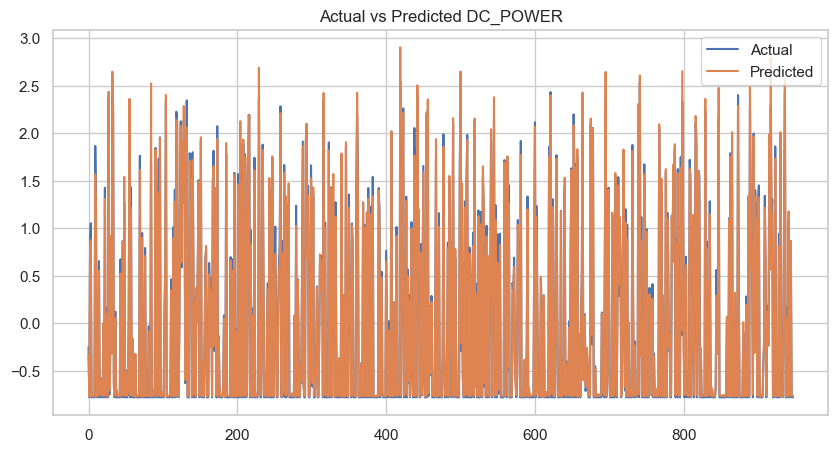

In [23]:

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Actual vs Predicted DC_POWER")
plt.legend()
plt.show()



In [24]:
# features used in model training
features = ['IRRADIATION', 'MODULE_TEMPERATURE', 'AMBIENT_TEMPERATURE']

# user input
user_input = []
print("Enter values for the following features:")

for feature in features:
    value = float(input(f"{feature}: "))
    user_input.append(value)

# Reshape to match scaler input
input_array = np.array(user_input).reshape(1, -1)

# Scale using a new scaler trained only on those 3 features
scaler = StandardScaler().fit(X_train)  
scaled_input = scaler.transform(input_array)

# Predict
predicted_power = model.predict(scaled_input)

print(f"\n⚡ Predicted DC Power: {predicted_power[0]:.4f}")


Enter values for the following features:

⚡ Predicted DC Power: 6616.7537


c:\Users\Asys\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Asys\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [25]:
joblib.dump(model, 'solar_Power_eneration_model.pkl')

['solar_Power_eneration_model.pkl']

Applying Random Forest Regressor for Solar Power Generation forecasting.


In [28]:
# Extract time-based features from the DATE_TIME index
Final_Data['HOUR'] = Final_Data.index.hour
Final_Data['DAY'] = Final_Data.index.day
Final_Data['MONTH'] = Final_Data.index.month
Final_Data['DAY_OF_WEEK'] = Final_Data.index.dayofweek

features = [
    'IRRADIATION',
    'MODULE_TEMPERATURE',
    'AMBIENT_TEMPERATURE',
    'HOUR',
    'DAY',
    'MONTH',
    'DAY_OF_WEEK'
]
target = 'DC_POWER'

X = Final_Data[features]
y = Final_Data[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [34]:

y_pred = model.predict(X_test)
y_pred


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.14901704e+05,
       1.69128450e+05, 0.00000000e+00, 7.73794204e+04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.55593065e+05, 9.98275714e+02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.87003950e+05, 2.18124099e+05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.04803175e+05,
       0.00000000e+00, 1.64692050e+03, 9.17985827e+04, 1.38248569e+05,
       0.00000000e+00, 1.14752049e+05, 2.49314436e+05, 0.00000000e+00,
       0.00000000e+00, 1.88582426e+05, 1.17097050e+05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.52965226e+04, 1.76926340e+05,
       7.12332238e+04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.38574609e+05, 2.24152252e+05, 1.99302159e+05, 0.00000000e+00,
       1.65501514e+05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.07775995e+04, 1.42001115e+05, 9.41076740e+04, 0.00000000e+00,
      

In [35]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R² Score:", r2)


MSE: 29304123.4118313
R² Score: 0.9960473914808812


In [38]:
# Prompt user for input values
IRRADIATION = float(input("Enter IRRADIATION value: "))
MODULE_TEMPERATURE = float(input("Enter MODULE_TEMPERATURE value: "))
AMBIENT_TEMPERATURE = float(input("Enter AMBIENT_TEMPERATURE value: "))
date_str = input("Enter date and time (YYYY-MM-DD HH:MM): ")

# parsing Date time and Extracting the input features
input_time = datetime.strptime(date_str, "%Y-%m-%d %H:%M")
hour = input_time.hour
day = input_time.day
month = input_time.month
day_of_week = input_time.weekday()

# creating Input Data Frame
input_df = pd.DataFrame([[IRRADIATION, MODULE_TEMPERATURE, AMBIENT_TEMPERATURE, hour, day, month, day_of_week]],
            columns=['IRRADIATION','MODULE_TEMPERATURE','AMBIENT_TEMPERATURE','HOUR','DAY','MONTH','DAY_OF_WEEK'])

# Scaling the user input
input_scaled = scaler.transform(input_df)

# making prediction with trained model
predicted_dc_power = model.predict(input_scaled)

# printing the predicted result
print(f"\n⚡ Predicted DC Power: {predicted_dc_power[0]:.4f}")


⚡ Predicted DC Power: 282579.9135


In [37]:
joblib.dump(model, 'solar_Power_eneration_Forecasting_model.pkl')

['solar_Power_eneration_Forecasting_model.pkl']